## P1

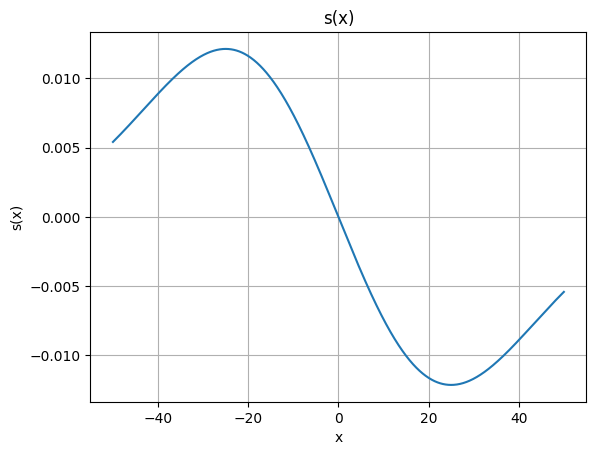

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sigma0 = 1
w = 25
L = 100
times = [1, 5, 10, 25, 50, 100]


def s(x):
    return - (x / (w**2)) * (sigma0**2 / 2) * np.exp(-(x**2) / (2 * w**2))

x = np.linspace(-L/2, L/2, 1000)
s_x = s(x)

plt.plot(x, s_x)
plt.xlabel('x')
plt.ylabel('s(x)')
plt.title('s(x)')
plt.grid(True)
plt.savefig('P1.png')
plt.show()

## P2 P3 P4

Use different integral convention 

alpha = 0: ito 
alpha = 0.5: Stratonovich convention
alpha = 1: anti-ito

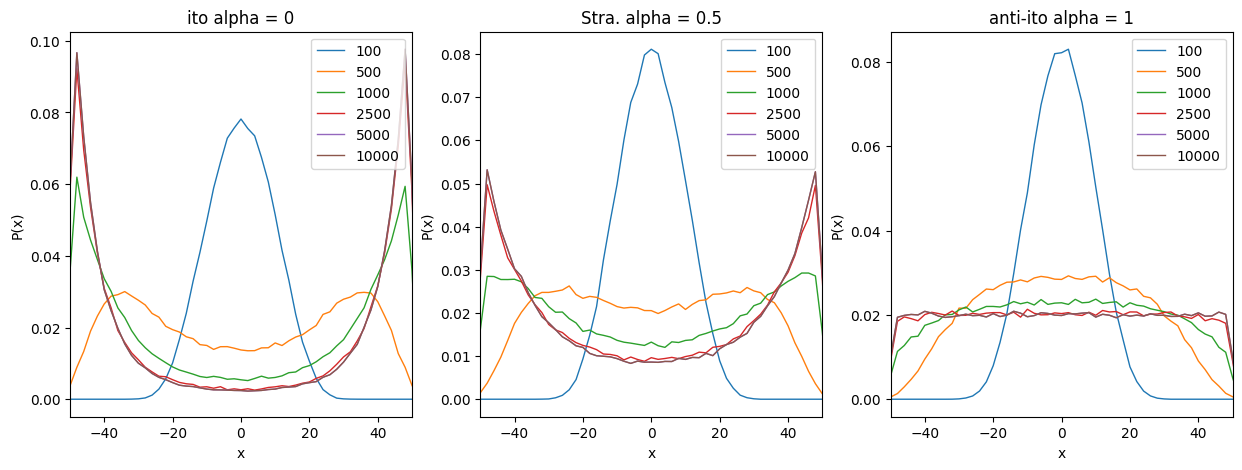

In [1]:
import numpy as np
import matplotlib.pyplot as plt


alphas = [0, 0.5, 1]
alpha_labels = ['ito alpha = 0', 'Stra. alpha = 0.5', 'anti-ito alpha = 1']


dt = 1
N_traj = 100000
t0 = 100
j_mult = np.array([1, 5, 10, 25, 50, 100])
x0 = 0
L = 100
x_min = -L / 2
x_max = L / 2
sigma0 = 1
w = 25


def sigma(x):
    return sigma0 * np.exp(-x ** 2 / (2 * w ** 2))


def dsigma_dx(x):
    return - (x / (w ** 2)) * sigma0 * np.exp(-x ** 2 / (2 * w ** 2))


# 循环绘制不同alpha值对应的图像
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for k, alpha in enumerate(alphas):
    x_fin = np.zeros([N_traj, np.size(j_mult)])
    for j in range(np.size(j_mult)):
        n_t0 = j_mult[j] * t0  # 计算对应的时间
        N_steps = int(np.ceil(n_t0 / dt))

        rn = np.random.normal(0, 1, size=(N_traj, N_steps))

        if j > 1:
            x = x_fin[:, j - 1]
        else:
            x = np.zeros(N_traj)

        for step in range(N_steps):
            sigma_x = sigma(x)
            d_sigma_x = dsigma_dx(x)
            dx_spurious = alpha * sigma_x * d_sigma_x * dt
            x += dx_spurious + sigma_x * rn[:, step]
            bounce_left = np.where(x < x_min)[0]
            x[bounce_left] = 2 * x_min - x[bounce_left]
            bounce_right = np.where(x > x_max)[0]
            x[bounce_right] = 2 * x_max - x[bounce_right]

        x_fin[:, j] = x

    bin_width = 2
    bins_edges = np.arange(-L - bin_width / 2, L + bin_width / 2 +.1, bin_width)
    bins = np.arange(-L, L +.1, bin_width)
    p_distr = np.zeros([np.size(bins), np.size(j_mult)])
    for j in range(np.size(j_mult)):
        distribution = np.histogram(x_fin[:, j], bins=bins_edges)
        p_distr[:, j] = distribution[0] / np.sum(distribution[0])

    for j in range(np.size(j_mult)):
        axs[k].plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j] * t0))
    axs[k].set_title(alpha_labels[k])
    axs[k].set_xlabel('x')
    axs[k].set_ylabel('P(x)')
    axs[k].set_xlim([x_min, x_max])
    axs[k].legend()

plt.savefig('P2_3_4.png')
plt.show()
